# Stroke Prediction Analysis

This notebook implements a machine learning pipeline for stroke prediction using tabular data. 

Model creation flow:
1. Data Loading and Initial Exploration
2. Data Cleaning
3. Feature Engineering
4. Model Training and Evaluation

## 1. Import Required Libraries

In [108]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [109]:
import logging
import os
import time
import unittest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Configure logging for the application
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

## 2. Load and Explore Data

In [110]:
# Load the dataset
data = pd.read_csv('https://gist.githubusercontent.com/sridhareaswaran/e5b70d93348977849ef4f1f68c1818c7/raw/1a80d4ed327d5c147640061f27e0b7250717e77d/healthcare-dataset-stroke-data.csv')

# Display basic information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

# Display first few rows
print("\nFirst few rows:")
data.head()

Dataset Shape: (5110, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

First few rows:


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

## 3. Data Analysis and Visualization

2025-01-20 23:41:34,172 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-20 23:41:34,176 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


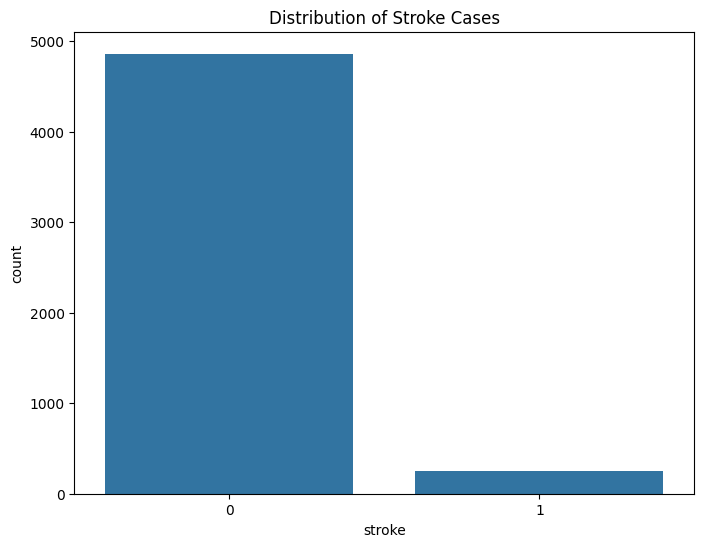


Basic Statistics:


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [111]:
# Check missing values
print("Missing Values:")
print(data.isnull().sum())

# Visualize distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='stroke')
plt.title('Distribution of Stroke Cases')
plt.show()

# Basic statistics
print("\nBasic Statistics:")
data.describe()

### Exploratory Data Analysis (EDA)

We will analyze the dataset to examine the distribution of various features and explore their relationships with the target variable, stroke.

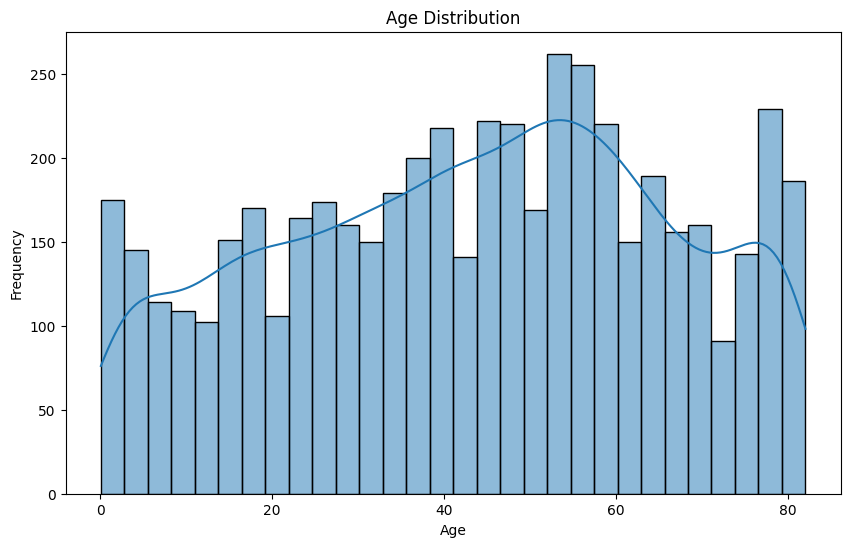

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

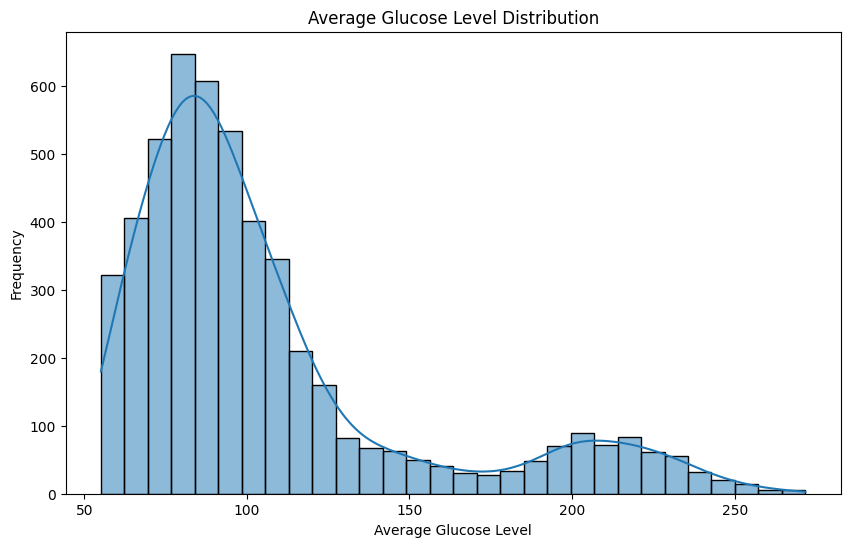

In [113]:
# Distribution of average glucose level
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_glucose_level'], kde=True, bins=30)
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

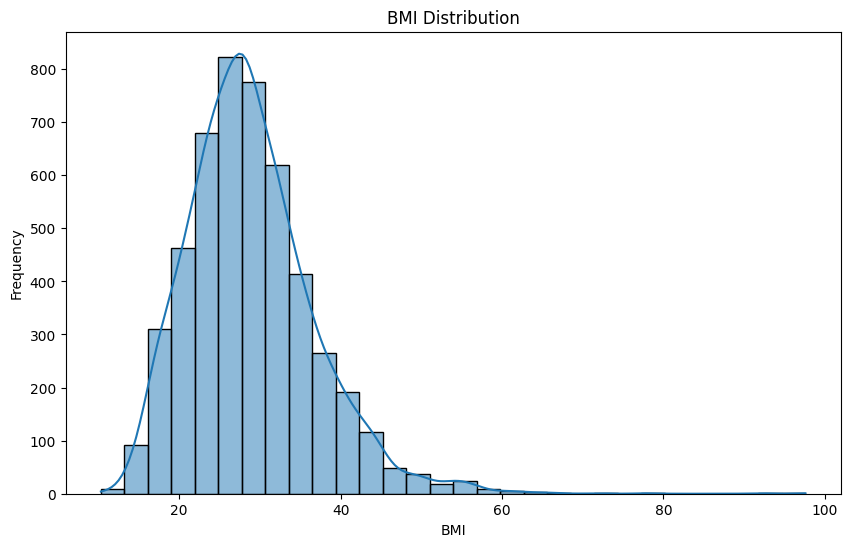

In [114]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

2025-01-20 23:41:34,480 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-20 23:41:34,484 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


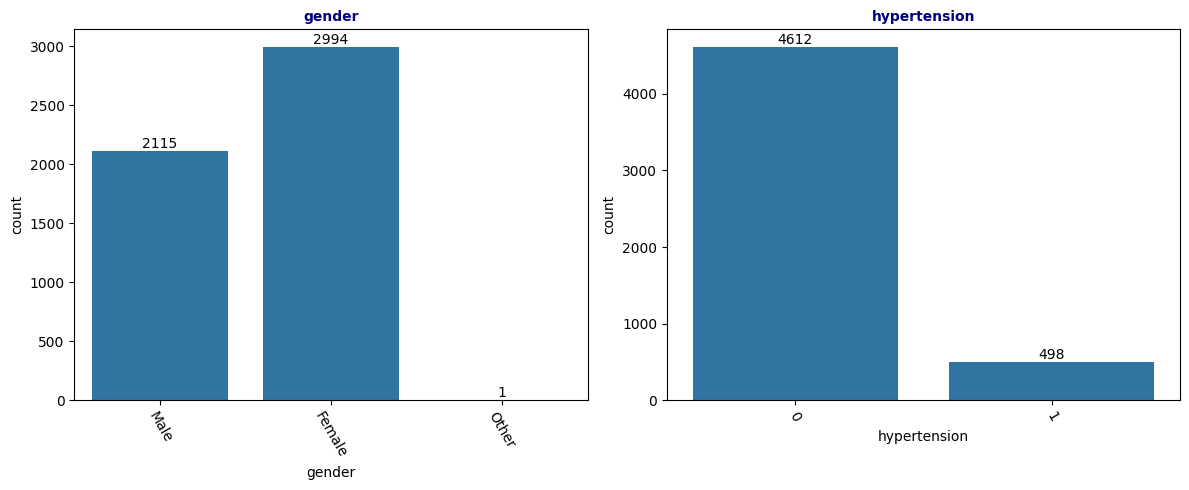

2025-01-20 23:41:34,568 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-20 23:41:34,572 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


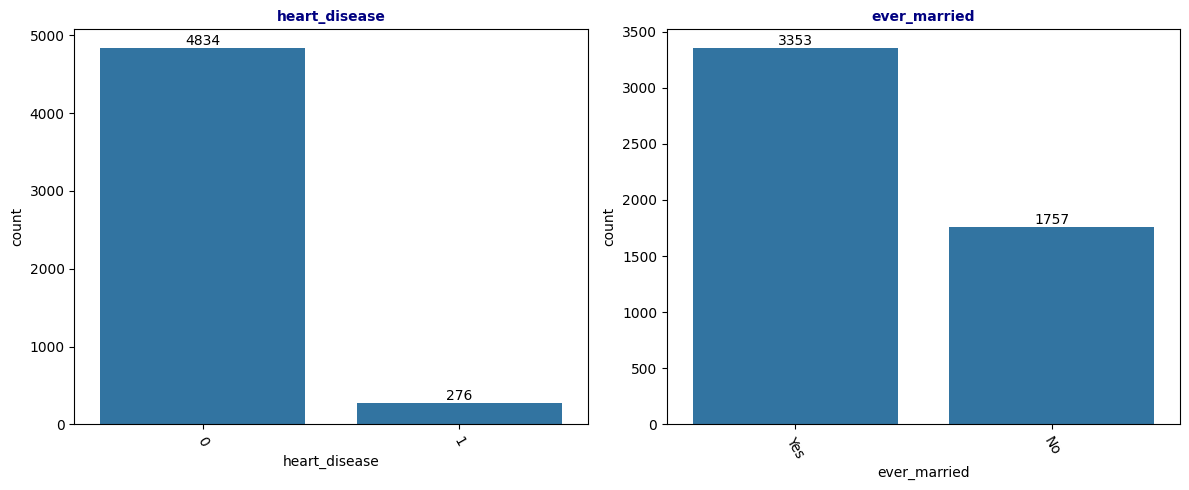

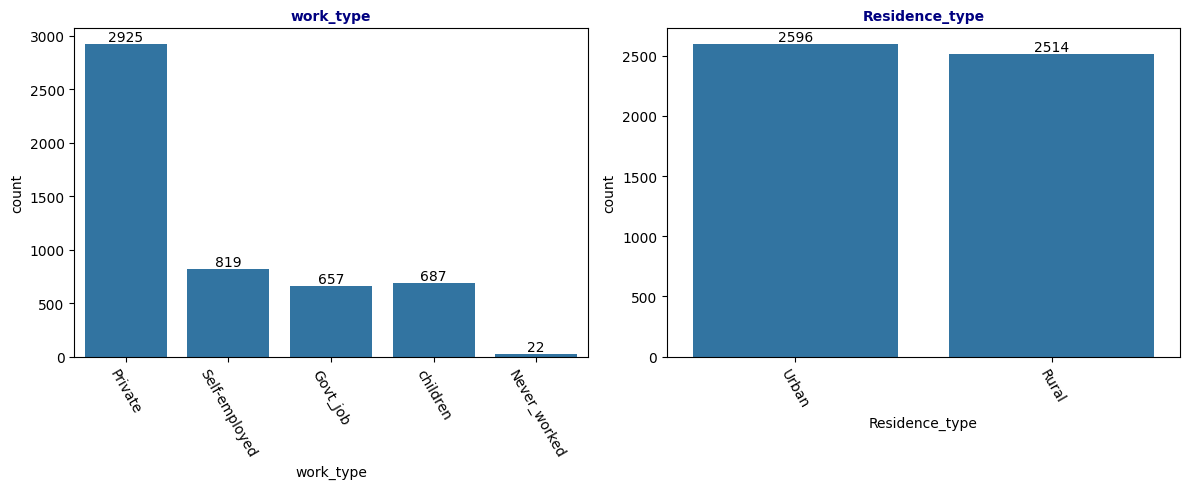

2025-01-20 23:41:34,844 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-20 23:41:34,847 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


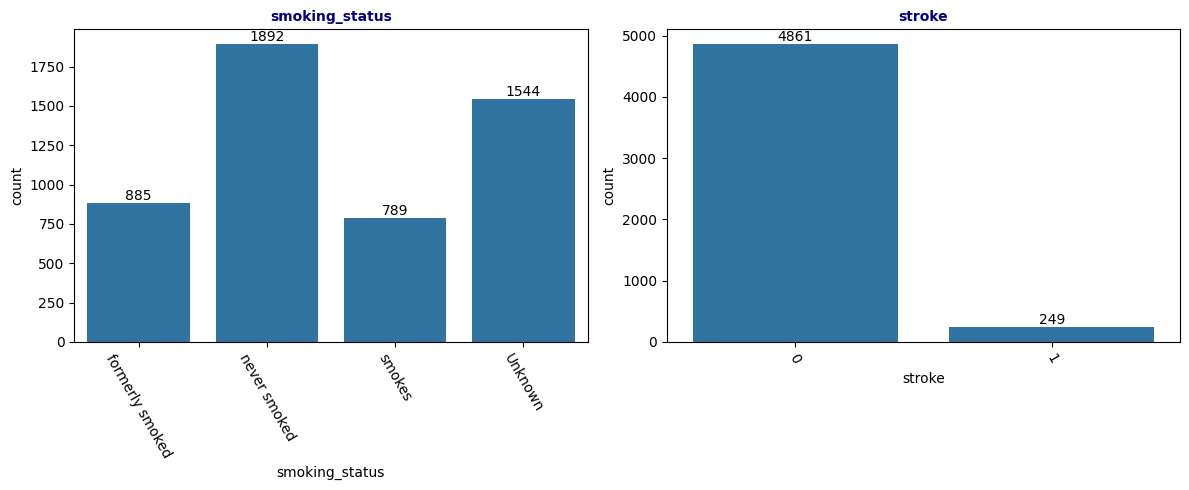

In [115]:

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Create subplots for the categorical columns
for i in range(0, len(categorical_columns), 2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.countplot(x=categorical_columns[i], data=data, ax=axes[0])
    axes[0].set_title(categorical_columns[i], fontsize=10, fontweight='bold', color='navy')
    axes[0].tick_params(axis='x', rotation=300)
    for container in axes[0].containers:
        axes[0].bar_label(container)

    if i + 1 < len(categorical_columns):
        sns.countplot(x=categorical_columns[i + 1], data=data, ax=axes[1])
        axes[1].set_title(categorical_columns[i + 1], fontsize=10, fontweight='bold', color='navy')
        axes[1].tick_params(axis='x', rotation=300)
        for container in axes[1].containers:
            axes[1].bar_label(container)
    else:
        axes[1].axis("off") 

    plt.tight_layout()
    plt.show()

### Correlation Heatmap

A correlation heatmap provides a visual representation of the relationships between numeric features in the dataset. By analyzing the heatmap, we can identify how strongly one feature is linearly related to another. This helps in understanding feature interactions and determining which features might have a significant influence on the target variable.

Let’s plot a heatmap to examine the correlations between all numeric features in the dataset and identify any strong positive or negative relationships. Features with high correlation (either positive or negative) may provide insights for feature selection or highlight potential multicollinearity issues.

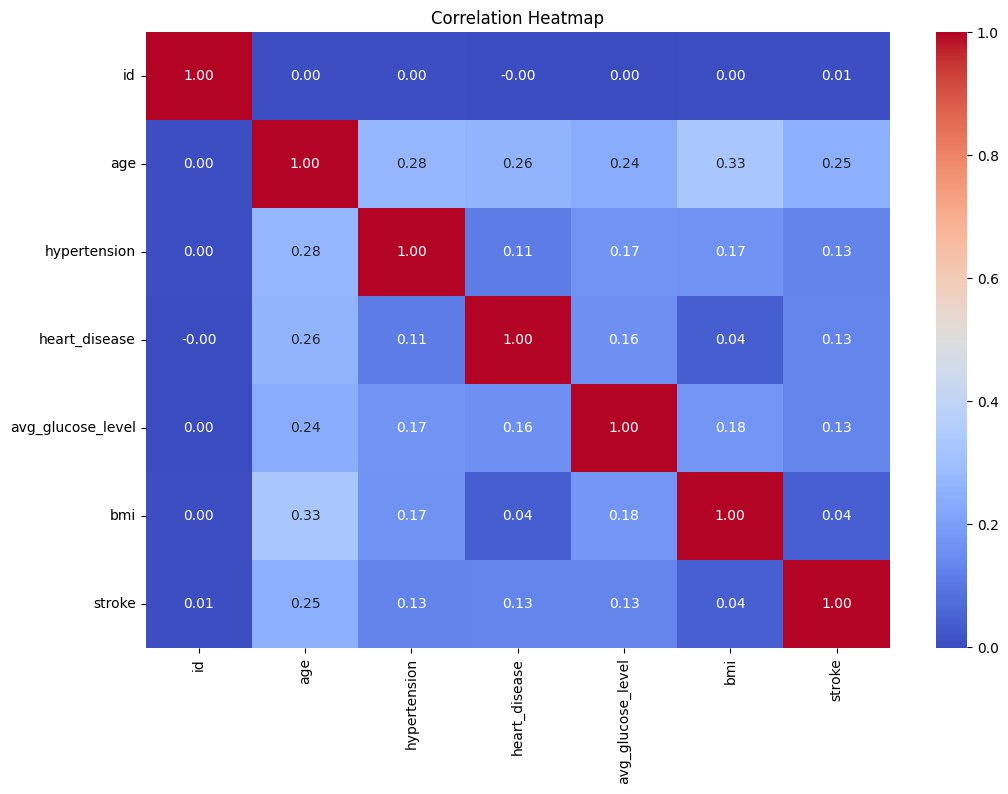

In [116]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 4. Data Preprocessing & Feature Engineering

#### Drop id column
The id column is dropped as it serves as a unique identifier for each row but does not contribute to the predictive power of the model.

#### Remove missing values
Remove data entries with missing 'bmi' as it corresponds no impact to model accuracy being less in number

#### Binary Encoding
Convert categorical features with only two unique values into binary numeric format for easier processing by machine learning models:
- ever_married: Encoded as 0 for “No” and 1 for “Yes”.
- Residence_type: Encoded as 0 for “Rural” and 1 for “Urban”.

#### One-Hot Encoding for Multi-Class Categorical Features
- For features with more than two categories, such as gender, work_type, and smoking_status, apply one-hot encoding to create separate binary columns for each category.
- The onehot_encode function is assumed to handle the transformation, creating additional columns for each category while dropping the original column.

#### Split Dataset into Features and Target
- Separate the target variable (stroke) from the features:
- X: Contains all feature columns used as input for the model.
- y: Contains the target column, which indicates whether a stroke occurred.

#### Train-Test Split
- Split the dataset into training and testing sets to evaluate model performance effectively. This ensures the model is tested on unseen data and helps prevent overfitting.
- The specific split ratio (e.g., 70% train, 30% test) can be customized as needed.

In [117]:
# def onehot_encode(df, column):
#     df = df.copy()
#     dummies = pd.get_dummies(df[column], prefix=column)
#     df = pd.concat([df, dummies], axis=1)
#     df = df.drop(column, axis=1)
#     return df

In [118]:
def onehot_encode(df, column):
    """
    Perform one-hot encoding on a specified categorical column in the dataframe.

    Parameters:
    df (pandas.DataFrame): The input dataframe.
    column (str): The name of the column to apply one-hot encoding.

    Returns:
    pandas.DataFrame: A new dataframe with the original column replaced by one-hot encoded columns.
    """
    # Log the start of the process
    logging.info(f"Starting One-Hot Encoding for column: {column}")
    
    # Check if the column exists in the dataframe
    if column not in df.columns:
        logging.error(f"Column '{column}' not found in dataframe!")
        raise ValueError(f"Column '{column}' not found in dataframe!")

    # Create a copy of the dataframe
    df = df.copy()

    # Create dummy variables
    logging.info(f"Creating dummy variables for column: {column}")
    dummies = pd.get_dummies(df[column], prefix=column)

    # Concatenate the dummies with the original dataframe
    df = pd.concat([df, dummies], axis=1)
    
    # Drop the original column
    logging.info(f"Dropping original column: {column}")
    df = df.drop(column, axis=1)
    
    logging.info(f"One-Hot Encoding completed for column: {column}")
    return df

In [119]:
def preprocess_inputs(df):
    """
    Preprocess the input dataframe by handling missing data, encoding categorical features,
    and performing data scaling and imputation.

    Steps:
    1. Drop the 'id' column from the dataframe.
    2. Handle missing values by removing rows with missing values.
    3. Apply binary encoding for 'ever_married' and 'Residence_type'.
    4. Apply one-hot encoding for categorical columns like 'gender', 'work_type', and 'smoking_status'.
    5. Split the dataframe into features (X) and target variable (y).
    6. Perform train-test split with 70% of data for training.
    7. Impute missing values using KNNImputer for both the training and test datasets.
    8. Scale features using StandardScaler.

    Parameters:
    df (pandas.DataFrame): The input dataframe.

    Returns:
    tuple: A tuple containing the training and test sets (X_train, X_test, y_train, y_test).
    """
    logging.info("Starting data preprocessing.")
    
    # Make a copy of the dataframe to avoid modifying the original
    df = df.copy()

    # Drop id column
    logging.info("Dropping 'id' column.")
    df = df.drop('id', axis=1)
    
    # Drop rows with missing target value (BMI column)
    logging.info("Dropping rows with missing target value (BMI).")
    df.dropna(how='any', inplace=True)
    
    # Binary encoding
    logging.info("Performing binary encoding on 'ever_married' and 'Residence_type' columns.")
    df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
    df['Residence_type'] = df['Residence_type'].replace({'Rural': 0, 'Urban': 1})
    
    # One-hot encoding
    logging.info("Performing one-hot encoding on categorical columns: 'gender', 'work_type', 'smoking_status'.")
    for column in ['gender', 'work_type', 'smoking_status']:
        df = onehot_encode(df, column=column)
    
    # Split df into X and y
    logging.info("Splitting data into features (X) and target (y).")
    y = df['stroke']
    X = df.drop('stroke', axis=1)
    
    # Train-test split
    logging.info("Splitting data into training and testing sets (70-30).")
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # KNN imputation of missing values
    logging.info("Performing KNN imputation to fill missing values.")
    imputer = KNNImputer()
    imputer.fit(X_train)
    X_train = pd.DataFrame(imputer.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    # Scale X
    logging.info("Scaling features using StandardScaler.")
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    logging.info("Data preprocessing completed successfully.")
    
    return X_train, X_test, y_train, y_test

In [120]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

2025-01-20 23:41:35,073 - INFO - Starting data preprocessing.
2025-01-20 23:41:35,076 - INFO - Dropping 'id' column.
2025-01-20 23:41:35,077 - INFO - Dropping rows with missing target value (BMI).
2025-01-20 23:41:35,078 - INFO - Performing binary encoding on 'ever_married' and 'Residence_type' columns.
2025-01-20 23:41:35,080 - INFO - Performing one-hot encoding on categorical columns: 'gender', 'work_type', 'smoking_status'.
2025-01-20 23:41:35,080 - INFO - Starting One-Hot Encoding for column: gender
2025-01-20 23:41:35,081 - INFO - Creating dummy variables for column: gender
2025-01-20 23:41:35,082 - INFO - Dropping original column: gender
2025-01-20 23:41:35,082 - INFO - One-Hot Encoding completed for column: gender
2025-01-20 23:41:35,083 - INFO - Starting One-Hot Encoding for column: work_type
2025-01-20 23:41:35,083 - INFO - Creating dummy variables for column: work_type
2025-01-20 23:41:35,084 - INFO - Dropping original column: work_type
2025-01-20 23:41:35,084 - INFO - One-Ho

In [121]:
X_train

age  hypertension  heart_disease  ever_married  Residence_type  \
478   1.023001     -0.322666      -0.227441      0.729299        0.958933   
3798 -1.688827     -0.322666      -0.227441     -1.371180        0.958933   
2615 -0.666335     -0.322666      -0.227441      0.729299       -1.042825   
425  -1.688827     -0.322666      -0.227441     -1.371180        0.958933   
3123  0.400614     -0.322666      -0.227441      0.729299       -1.042825   
...        ...           ...            ...           ...             ...   
3036 -0.132860     -0.322666      -0.227441      0.729299        0.958933   
2899  0.533983     -0.322666      -0.227441      0.729299        0.958933   
962  -0.444054     -0.322666      -0.227441     -1.371180       -1.042825   
4157 -1.288722     -0.322666      -0.227441     -1.371180       -1.042825   
275   1.067457     -0.322666      -0.227441      0.729299       -1.042825   

      avg_glucose_level       bmi  gender_Female  gender_Male  gender_Other  \
478           -0.405669 -0.833400       0.833235    -0.832733     -0.017062   
3798           0.151093 -1.144398      -1.200142     1.200864     -0.017062   
2615          -1.051083 -1.027774       0.833235    -0.832733     -0.017062   
425           -0.615210 -1.960767       0.833235    -0.832733     -0.017062   
3123          -0.930865  0.125509      -1.200142     1.200864     -0.017062   
...                 ...       ...            ...          ...           ...   
3036          -0.016137 -0.522403      -1.200142     1.200864     -0.017062   
2899          -0.818707 -0.250280      -1.200142     1.200864     -0.017062   
962           -0.625508 -0.366904      -1.200142     1.200864     -0.017062   
4157           0.143257 -0.535361       0.833235    -0.832733     -0.017062   
275           -0.240678 -0.068864       0.833235    -0.832733     -0.017062   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
478             2.582565               -0.070514          -1.171720   
3798           -0.387212               -0.070514          -1.171720   
2615           -0.387212               -0.070514           0.853446   
425            -0.387212               -0.070514          -1.171720   
3123           -0.387212               -0.070514           0.853446   
...                  ...                     ...                ...   
3036           -0.387212               -0.070514           0.853446   
2899           -0.387212               -0.070514           0.853446   
962            -0.387212               -0.070514           0.853446   
4157           -0.387212               -0.070514          -1.171720   
275             2.582565               -0.070514          -1.171720   

      work_type_Self-employed  work_type_children  smoking_status_Unknown  \
478                  -0.42133           -0.395617               -0.657467   
3798                 -0.42133            2.527696                1.520988   
2615                 -0.42133           -0.395617                1.520988   
425                  -0.42133            2.527696                1.520988   
3123                 -0.42133           -0.395617               -0.657467   
...                       ...                 ...                     ...   
3036                 -0.42133           -0.395617                1.520988   
2899                 -0.42133           -0.395617               -0.657467   
962                  -0.42133           -0.395617                1.520988   
4157                 -0.42133            2.527696                1.520988   
275                  -0.42133           -0.395617               -0.657467   

      smoking_status_formerly smoked  smoking_status_never smoked  \
478                         2.235287                    -0.779172   
3798                       -0.447370                    -0.779172   
2615                       -0.447370                    -0.779172   
425                        -0.447370                    -0.779172   
3123          

In [122]:
y_train

478     0
3798    0
2615    0
425     0
3123    0
       ..
3036    0
2899    0
962     0
4157    0
275     0
Name: stroke, Length: 3436, dtype: int64

#### Oversampling to balance dataset

Oversampling is done on the dataset by increasing the number of instances of the minority class. Here in the dataset oversampling is done on the minority class (stroke == 1) to balance the dataset by duplicating some of its samples until both classes have an equal number of instances.

In [123]:
oversampled_data = pd.concat([X_train, y_train], axis=1).copy()

num_samples = y_train.value_counts()[0] - y_train.value_counts()[1]
new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=1)

oversampled_data = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

y_train_oversampled = oversampled_data['stroke']
X_train_oversampled = oversampled_data.drop('stroke', axis=1)

In [124]:
def oversample_data(X_train, y_train):
    """
    Perform oversampling to balance the class distribution in the training dataset.

    This method oversamples the minority class (stroke=1) by duplicating random samples 
    and appending them to the training set.

    Parameters:
    X_train (pandas.DataFrame): The training feature set.
    y_train (pandas.Series): The training target variable.

    Returns:
    tuple: A tuple containing the oversampled feature set and target variable (X_train_oversampled, y_train_oversampled).
    """
    oversampled_data = pd.concat([X_train, y_train], axis=1).copy()

    num_samples = y_train.value_counts()[0] - y_train.value_counts()[1]
    new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=1)

    oversampled_data = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

    y_train_oversampled = oversampled_data['stroke']
    X_train_oversampled = oversampled_data.drop('stroke', axis=1)

    return X_train_oversampled, y_train_oversampled

In [125]:
X_train_oversampled ,y_train_oversampled = oversample_data(X_train, y_train)

In [126]:
X_train_oversampled

age  hypertension  heart_disease  ever_married  Residence_type  \
0     0.311702     -0.322666      -0.227441      0.729299        0.958933   
1     0.311702      3.099183      -0.227441      0.729299       -1.042825   
2    -1.599915     -0.322666      -0.227441     -1.371180        0.958933   
3    -0.577422     -0.322666      -0.227441     -1.371180        0.958933   
4    -0.043948     -0.322666      -0.227441      0.729299       -1.042825   
...        ...           ...            ...           ...             ...   
6577  0.356158     -0.322666      -0.227441      0.729299        0.958933   
6578  1.289738     -0.322666      -0.227441      0.729299       -1.042825   
6579  1.156369     -0.322666       4.396744      0.729299        0.958933   
6580  0.578439     -0.322666      -0.227441      0.729299        0.958933   
6581  1.645388     -0.322666       4.396744      0.729299        0.958933   

      avg_glucose_level       bmi  gender_Female  gender_Male  gender_Other  \
0              1.103878  0.630881       0.833235    -0.832733     -0.017062   
1             -0.720428  0.177342       0.833235    -0.832733     -0.017062   
2             -0.416639 -0.859317       0.833235    -0.832733     -0.017062   
3             -0.884748 -0.535361       0.833235    -0.832733     -0.017062   
4             -0.381715 -0.639027       0.833235    -0.832733     -0.017062   
...                 ...       ...            ...          ...           ...   
6577           0.394886  0.358758       0.833235    -0.832733     -0.017062   
6578          -0.166577 -0.263238       0.833235    -0.832733     -0.017062   
6579           2.011889 -0.081822      -1.200142     1.200864     -0.017062   
6580          -0.517380  0.203259      -1.200142     1.200864     -0.017062   
6581           3.298911  0.203259      -1.200142     1.200864     -0.017062   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0              -0.387212               -0.070514           0.853446   
1              -0.387212               -0.070514           0.853446   
2              -0.387212               -0.070514          -1.171720   
3              -0.387212               -0.070514          -1.171720   
4              -0.387212               -0.070514           0.853446   
...                  ...                     ...                ...   
6577           -0.387212               -0.070514           0.853446   
6578           -0.387212               -0.070514           0.853446   
6579           -0.387212               -0.070514          -1.171720   
6580           -0.387212               -0.070514           0.853446   
6581           -0.387212               -0.070514          -1.171720   

      work_type_Self-employed  work_type_children  smoking_status_Unknown  \
0                   -0.421330           -0.395617               -0.657467   
1                   -0.421330           -0.395617               -0.657467   
2                   -0.421330            2.527696                1.520988   
3                    2.373437           -0.395617               -0.657467   
4                   -0.421330           -0.395617               -0.657467   
...                       ...                 ...                     ...   
6577                -0.421330           -0.395617               -0.657467   
6578                -0.421330           -0.395617               -0.657467   
6579                 2.373437           -0.395617               -0.657467   
6580                -0.421330           -0.395617               -0.657467   
6581                 2.373437           -0.395617               -0.657467   

      smoking_status_formerly smoked  smoking_status_never smoked  \
0                          -0.447370                     1.283413   
1                           2.235287                    -0.779172   
2                          -0.447370                    -0.779172   
3                          -0.447370                    -0.779172   
4             

In [127]:
y_train_oversampled

0       0
1       1
2       0
3       0
4       0
       ..
6577    0
6578    1
6579    1
6580    0
6581    1
Name: stroke, Length: 6582, dtype: int64

## 6. Model Training and Evaluation

In [128]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

# Verify that all models can be trained
for name, model in models.items():
    try:
        # Train the model
        model.fit(X_train_oversampled, y_train_oversampled)
        logging.info(f"{name} trained successfully.")
    except Exception as e:
        logging.error(f"Error occurred while training {name}: {str(e)}")

2025-01-20 23:41:35,146 - INFO - Logistic Regression trained successfully.
2025-01-20 23:41:35,147 - INFO - K-Nearest Neighbors trained successfully.
2025-01-20 23:41:35,156 - INFO - Support Vector Machine (Linear Kernel) trained successfully.
2025-01-20 23:41:35,427 - INFO - Support Vector Machine (RBF Kernel) trained successfully.
2025-01-20 23:41:36,692 - INFO - Neural Network trained successfully.
2025-01-20 23:41:37,041 - INFO - Gradient Boosting trained successfully.


In [129]:
def train_and_evaluate(models, X_train, y_train):
    """
    Train and evaluate multiple models on the given training data.

    For each model, this method trains the model on the training data, 
    generates predictions, and calculates evaluation metrics such as 
    accuracy, precision, and F1-score.

    Parameters:
    models (dict): A dictionary where the keys are model names and the values are the machine learning models.
    X_train (pandas.DataFrame): The training feature set.
    y_train (pandas.Series): The training target variable.

    Returns:
    pandas.DataFrame: A dataframe containing the evaluation metrics (Accuracy, Precision, F1-Score, and Runtime) 
    for each model.
    """
    # List to hold the metrics for each model
    metrics = []

    # Loop through each model in the models dictionary
    for name, model in models.items():
        try:
            # Record start time for model training
            start_time = time.time()
            logging.info(f"Training {name}...")
            
            # Train the model on the training data
            model.fit(X_train, y_train)
            
            # Record end time and calculate the training time
            end_time = time.time()
            training_time = end_time - start_time

            # Generate predictions for training data
            y_train_pred = model.predict(X_train)

            # Calculate evaluation metrics
            accuracy = accuracy_score(y_train, y_train_pred)
            precision = precision_score(y_train, y_train_pred, average='weighted')
            f1 = f1_score(y_train, y_train_pred, average='weighted')

            # Append the results to the metrics list
            metrics.append({
                "Model": name,
                "Accuracy": accuracy,
                "Precision": precision,
                "F1-Score": f1,
                "Runtime (s)": training_time
            })

            # Log successful training of the model
            logging.info(f"{name} trained successfully in {training_time:.2f} seconds.")

        except Exception as e:
            # Log the error if something goes wrong
            logging.error(f"Error occurred while training {name}: {str(e)}")

    # Return a DataFrame containing the metrics for each model
    return pd.DataFrame(metrics)

In [130]:
train_metrics_data = train_and_evaluate(models, X_train_oversampled, y_train_oversampled)

print("Model Training Metrics:")
print(train_metrics_data.to_string(index=False))

2025-01-20 23:41:37,050 - INFO - Training Logistic Regression...
2025-01-20 23:41:37,077 - INFO - Logistic Regression trained successfully in 0.02 seconds.
2025-01-20 23:41:37,077 - INFO - Training K-Nearest Neighbors...
2025-01-20 23:41:37,137 - INFO - K-Nearest Neighbors trained successfully in 0.00 seconds.
2025-01-20 23:41:37,137 - INFO - Training Support Vector Machine (Linear Kernel)...
2025-01-20 23:41:37,147 - INFO - Support Vector Machine (Linear Kernel) trained successfully in 0.01 seconds.
2025-01-20 23:41:37,148 - INFO - Training Support Vector Machine (RBF Kernel)...
2025-01-20 23:41:37,237 - INFO - Support Vector Machine (RBF Kernel) trained successfully in 0.04 seconds.
2025-01-20 23:41:37,237 - INFO - Training Neural Network...
2025-01-20 23:41:37,928 - INFO - Neural Network trained successfully in 0.69 seconds.
2025-01-20 23:41:37,929 - INFO - Training Gradient Boosting...
2025-01-20 23:41:38,156 - INFO - Gradient Boosting trained successfully in 0.22 seconds.


Model Training Metrics:
                                 Model  Accuracy  Precision  F1-Score  Runtime (s)
                   Logistic Regression  0.958091   0.959848  0.937872     0.017967
                   K-Nearest Neighbors  0.958964   0.948760  0.941506     0.001619
Support Vector Machine (Linear Kernel)  0.957800   0.917380  0.937154     0.007353
   Support Vector Machine (RBF Kernel)  0.958382   0.960115  0.938581     0.035789
                        Neural Network  0.964785   0.960093  0.954771     0.687653
                     Gradient Boosting  0.966822   0.966917  0.956661     0.222741
